In this notebook I wanted to run some checks / experiments on whether I could reduce the size of a shapefile. I try various options, simplifiying the geometry, trying to assign a field as categorical field, running a memory reducing function from a kaggle competition. But the only thing that really worked in the ultimate file size of a written shapefile was... only writing the columns of data I needed. <br>
This notebook may be of some use to memory optimisation - especially if you have an incredibly large dataset!

In [1]:
import geopandas as gpd
import numpy as np

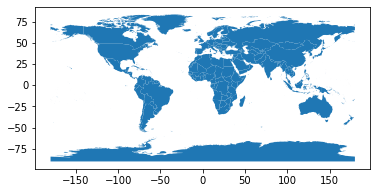

In [2]:
gdf = gpd.GeoDataFrame.from_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip')
gdf.plot()

In [3]:
gdf.columns # check what columns I have

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [4]:
len(gdf.columns) # get the number of columns

95

In [5]:
gdf.shape # shape basically tells me the same thing

(241, 95)

In [6]:
gdf.memory_usage() # check on the memory usage

Index          128
featurecla    1928
scalerank     1928
LABELRANK     1928
SOVEREIGNT    1928
              ... 
NAME_SV       1928
NAME_TR       1928
NAME_VI       1928
NAME_ZH       1928
geometry      1928
Length: 96, dtype: int64

In [7]:
gdf.memory_usage(index=True).sum() # total memory usage in bytes (later in mb)

183288

In [8]:
gdf.to_file("countries_raw.shp") # write the url out locally

In [9]:
simple = gdf.simplify(10) 
# simplifiy the geometry of my shapefile (I don't really want 10 as my tolerance, but visually you can see the change)

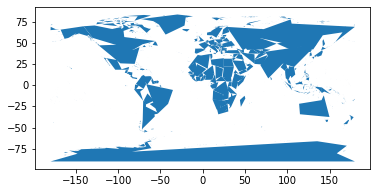

In [10]:
simple.plot() # plot it

In [11]:
simple 
# simple is a geoseries, if in doubt look at difference between series and frame in pandas

0      POLYGON ((31.28789 -22.40205, 28.01406 -21.554...
1      POLYGON ((30.39609 -15.64307, 23.38066 -17.640...
2      MULTIPOLYGON (((53.08564 16.64839, 44.00586 12...
3      MULTIPOLYGON (((104.06396 10.39082, 104.07578 ...
4      MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...
                             ...                        
236    POLYGON ((19.34238 41.86909, 20.52285 42.17148...
237    POLYGON ((66.52227 37.34849, 70.87891 38.45640...
238    POLYGON ((77.04863 35.10991, 76.76689 35.66172...
239    MULTIPOLYGON (((-45.71777 -60.52090, -45.22813...
240    POLYGON ((-63.12305 18.06895, -63.01118 18.068...
Length: 241, dtype: geometry

In [12]:
## drop geodataframe geometry
## join on index
gdf.drop(['geometry'], axis=1, inplace=True)
gdf_simple_attr = gdf.merge(simple.to_frame(), left_index=True, right_index=True)

In [13]:
gdf_simple_attr # it will not be a geodataframe now

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,0
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Zimbabwe,辛巴威,"POLYGON ((31.28789 -22.40205, 28.01406 -21.554..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.39609 -15.64307, 23.38066 -17.640..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,예멘,Jemen,Jemen,Iémen,Йемен,Jemen,Yemen,Yemen,也门,"MULTIPOLYGON (((53.08564 16.64839, 44.00586 12..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,베트남,Vietnam,Wietnam,Vietname,Вьетнам,Vietnam,Vietnam,Việt Nam,越南,"MULTIPOLYGON (((104.06396 10.39082, 104.07578 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,베네수엘라,Venezuela,Wenezuela,Venezuela,Венесуэла,Venezuela,Venezuela,Venezuela,委內瑞拉,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Admin-0 country,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,...,알바니아,Albanië,Albania,Albânia,Албания,Albanien,Arnavutluk,Albania,阿尔巴尼亚,"POLYGON ((19.34238 41.86909, 20.52285 42.17148..."
237,Admin-0 country,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,...,아프가니스탄,Afghanistan,Afganistan,Afeganistão,Афганистан,Afghanistan,Afganistan,Afghanistan,阿富汗,"POLYGON ((66.52227 37.34849, 70.87891 38.45640..."
238,Admin-0 country,1,5,Kashmir,KAS,0,2,Indeterminate,Siachen Glacier,KAS,...,시아첸 빙하,Siachengletsjer,Lodowiec Siachen,Glaciar de Siachen,Сиачен,Siachen Glaciären,Siachen Buzulu,Sông băng Siachen,锡亚琴冰川,"POLYGON ((77.04863 35.10991, 76.76689 35.66172..."
239,Admin-0 country,3,4,Antarctica,ATA,0,2,Indeterminate,Antarctica,ATA,...,남극,Antarctica,Antarktyda,Antártida,Антарктида,Antarktis,Antarktika,Châu Nam Cực,南极洲,"MULTIPOLYGON (((-45.71777 -60.52090, -45.22813..."


In [14]:
type(gdf_simple_attr)

pandas.core.frame.DataFrame

In [15]:
# rename the 0 column to geometry and set it to a geodataframe
gdf_simple_attr.rename(columns={0: 'geometry'}, inplace=True)
gdf_simple_attr = gpd.GeoDataFrame(gdf_simple_attr, geometry='geometry')

In [16]:
type(gdf_simple_attr)

geopandas.geodataframe.GeoDataFrame

In [17]:
gdf_simple_attr.memory_usage(index=True).sum() # memory usage is the same!

183288

In [18]:
gdf.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [19]:
gdf.info(memory_usage='deep') # investigate fields

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 94 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   featurecla  241 non-null    object 
 1   scalerank   241 non-null    int64  
 2   LABELRANK   241 non-null    int64  
 3   SOVEREIGNT  241 non-null    object 
 4   SOV_A3      241 non-null    object 
 5   ADM0_DIF    241 non-null    int64  
 6   LEVEL       241 non-null    int64  
 7   TYPE        241 non-null    object 
 8   ADMIN       241 non-null    object 
 9   ADM0_A3     241 non-null    object 
 10  GEOU_DIF    241 non-null    int64  
 11  GEOUNIT     241 non-null    object 
 12  GU_A3       241 non-null    object 
 13  SU_DIF      241 non-null    int64  
 14  SUBUNIT     241 non-null    object 
 15  SU_A3       241 non-null    object 
 16  BRK_DIFF    241 non-null    int64  
 17  NAME        241 non-null    object 
 18  NAME_LONG   241 non-null    object 
 19  BRK_A3      241 non-n

In [20]:
gdf.memory_usage(deep=True)

Index           128
featurecla    17352
scalerank      1928
LABELRANK      1928
SOVEREIGNT    16024
              ...  
NAME_RU       24898
NAME_SV       16777
NAME_TR       18679
NAME_VI       19237
NAME_ZH       21662
Length: 95, dtype: int64

In [21]:
gdf.featurecla

0      Admin-0 country
1      Admin-0 country
2      Admin-0 country
3      Admin-0 country
4      Admin-0 country
            ...       
236    Admin-0 country
237    Admin-0 country
238    Admin-0 country
239    Admin-0 country
240    Admin-0 country
Name: featurecla, Length: 241, dtype: object

In [22]:
# change the featurecla field to category type
gdf['featurecla'] = gdf.featurecla.astype('category')

In [23]:
gdf.memory_usage(deep=True) # big impavy on memory

Index           128
featurecla      393
scalerank      1928
LABELRANK      1928
SOVEREIGNT    16024
              ...  
NAME_RU       24898
NAME_SV       16777
NAME_TR       18679
NAME_VI       19237
NAME_ZH       21662
Length: 95, dtype: int64

In [24]:
gdf.featurecla

0      Admin-0 country
1      Admin-0 country
2      Admin-0 country
3      Admin-0 country
4      Admin-0 country
            ...       
236    Admin-0 country
237    Admin-0 country
238    Admin-0 country
239    Admin-0 country
240    Admin-0 country
Name: featurecla, Length: 241, dtype: category
Categories (1, object): [Admin-0 country]

In [25]:
# but we cannot write this out. try it and you will get an error

In [26]:
# reload the gdf object
gdf = gpd.GeoDataFrame.from_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip')

In [27]:
# impact on removing columns
fields_keep = ['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'geometry']
gdf_small = gdf.reindex(columns=fields_keep)

In [28]:
# removing some fields does impact the memory
gdf_small.memory_usage(index=True).sum()

142800

In [29]:
gdf_small.to_file('countries_reduce_fields.shp')

In [30]:
# geojson was suprising larger on write
gdf_small.to_file('countries_reduce_fields.geojson', driver='GeoJSON', encoding='utf-8')

In [31]:
# This function is copied directly from the following page - no changes have been made
# https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [32]:
# reload and run the reduce_mem_usage function
# I have to drop the geometry column, otherwise it will though an error I'll put it back later
gdf = gpd.GeoDataFrame.from_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip')
gdf.drop(['geometry'], axis=1, inplace=True)
gdf, NAlist = reduce_mem_usage(gdf)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 0.1729583740234375  MB
******************************
Column:  scalerank
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  LABELRANK
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  ADM0_DIF
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  LEVEL
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  GEOU_DIF
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  SU_DIF
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  BRK_DIFF
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  MAPCOLOR7
dtype before:  int64
dtype after:  uint8


In [33]:
# reapplying the geometry field and merging
gdf_geo = gpd.GeoDataFrame.from_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip')
gdf_geo = gdf_geo.reindex(columns=['geometry'])
gdf_small = gdf_geo.merge(gdf, left_index=True, right_index=True)

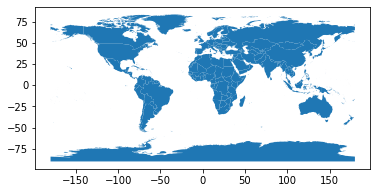

In [34]:
gdf_small = gpd.GeoDataFrame(gdf_small, geometry='geometry')
gdf_small.plot()

In [35]:
gdf_small.memory_usage(index=True).sum()/ 1024**2 # size has reduced!

0.13112831115722656

In [36]:
fields_keep = ['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'geometry']
gdf_small = gdf_small.reindex(columns=fields_keep)
gdf_small.memory_usage(index=True).sum()/ 1024**2 

0.09251594543457031

In [37]:
gdf_small.to_file('countries_small.shp') # but on write all the reduce_mem_usage is lost!

In [38]:
gdf_small.to_file(filename='countries_small.zip', driver='ESRI Shapefile') # should work in gdal 3.1 +

In [39]:
from osgeo import gdal
gdal.__version__

'3.0.2'